In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Importing the clean dataset

clean_credit_card_df = pd.read_csv('cleaned_credit_card_data.csv')

In [10]:
# Drop useless columns (identifiers, etc.)
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']
if columns_to_drop[0] in clean_credit_card_df.columns:
    clean_credit_card_df.drop(columns=columns_to_drop, inplace=True)

# Merge City and Street columns into a single Address column (at the start of the DataFrame)
if 'City' in clean_credit_card_df.columns and 'Street' in clean_credit_card_df.columns:
    clean_credit_card_df['Address'] = clean_credit_card_df['City'] + ', ' + clean_credit_card_df['Street']
    clean_credit_card_df.drop(columns=['City', 'Street'], inplace=True)
    address_column = clean_credit_card_df.pop('Address')
    clean_credit_card_df.insert(0, 'Address', address_column)

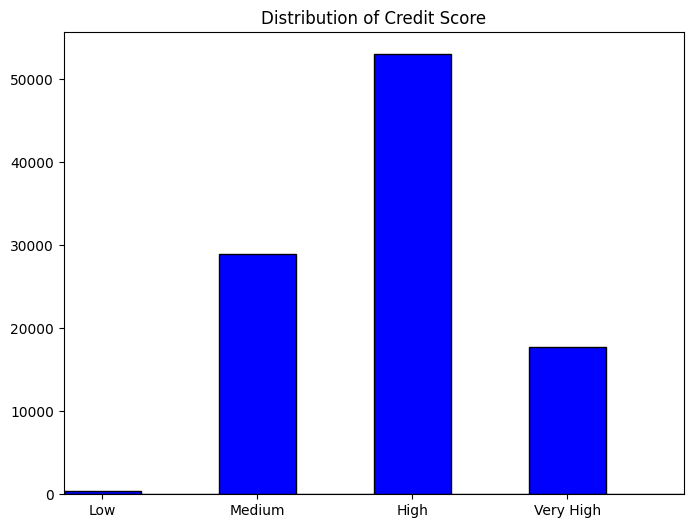

In [32]:
# Show the distribution of the target variable with an histogram
bins = np.arange(0, 4.5, 0.5)

plt.figure(figsize=(8, 6))
plt.hist(clean_credit_card_df['Credit_Score'], bins=bins, color='blue', alpha=1.0, edgecolor='black')
plt.title('Distribution of Credit Score')
plt.xticks([0.25, 1.25, 2.25, 3.25], ['Low', 'Medium', 'High', 'Very High'])
plt.xlim(0, 4)
plt.show()

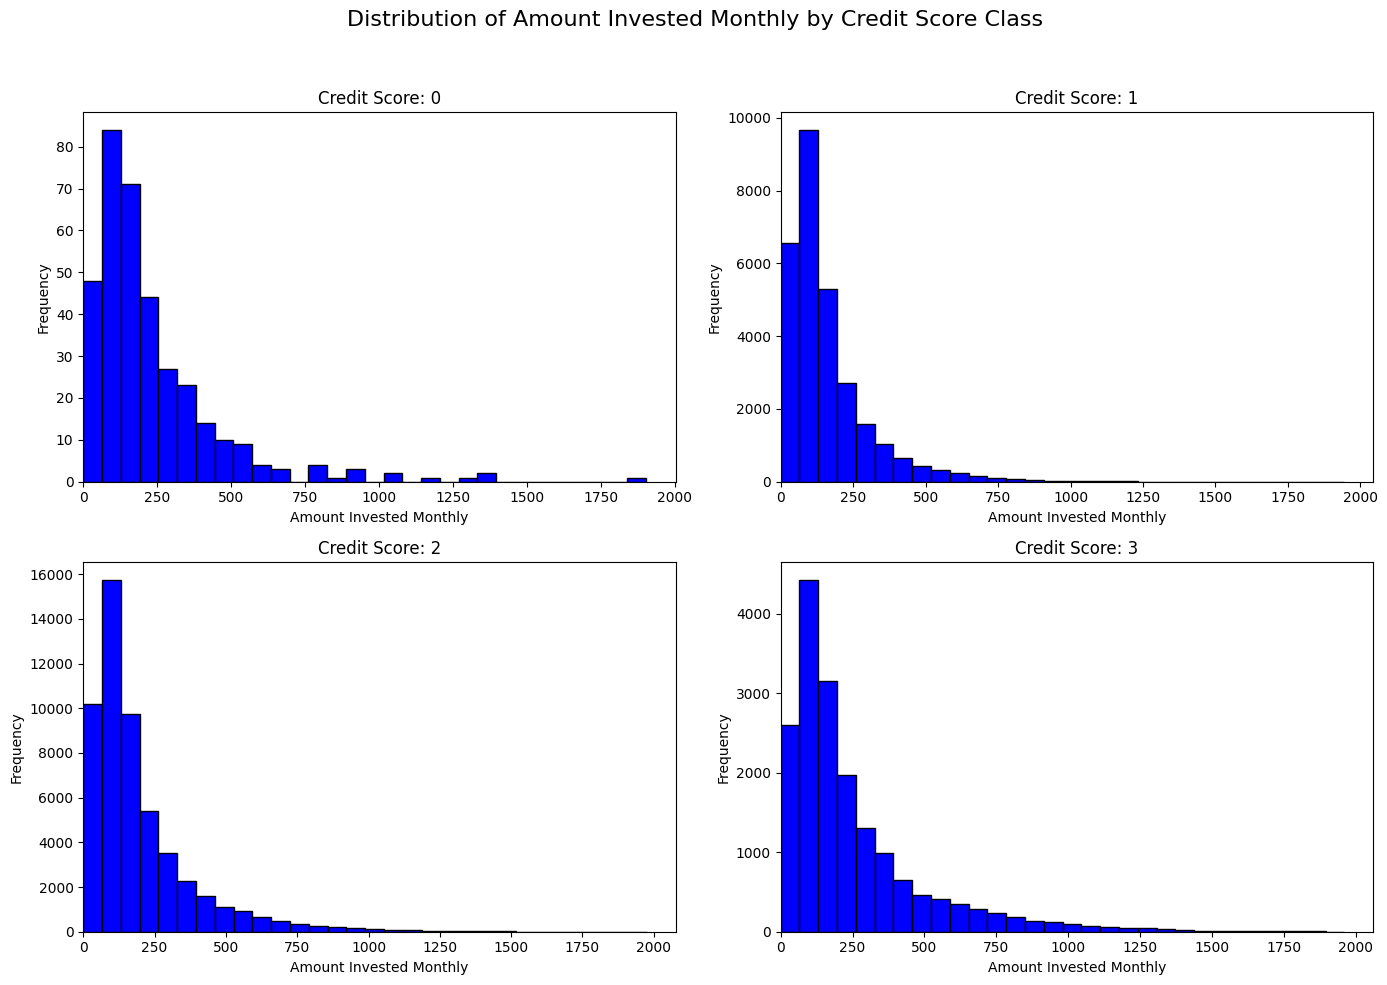

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Amount Invested Monthly by Credit Score Class', fontsize=16)
axes = axes.flatten()

for i in range(4):
    subset = clean_credit_card_df[clean_credit_card_df['Credit_Score'] == i]['Amount_invested_monthly'].dropna()
    
    axes[i].hist(subset, bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Credit Score: {i}')
    axes[i].set_xlabel('Amount Invested Monthly')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, subset.max() + 100)  # Optional: still okay to set xlim

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



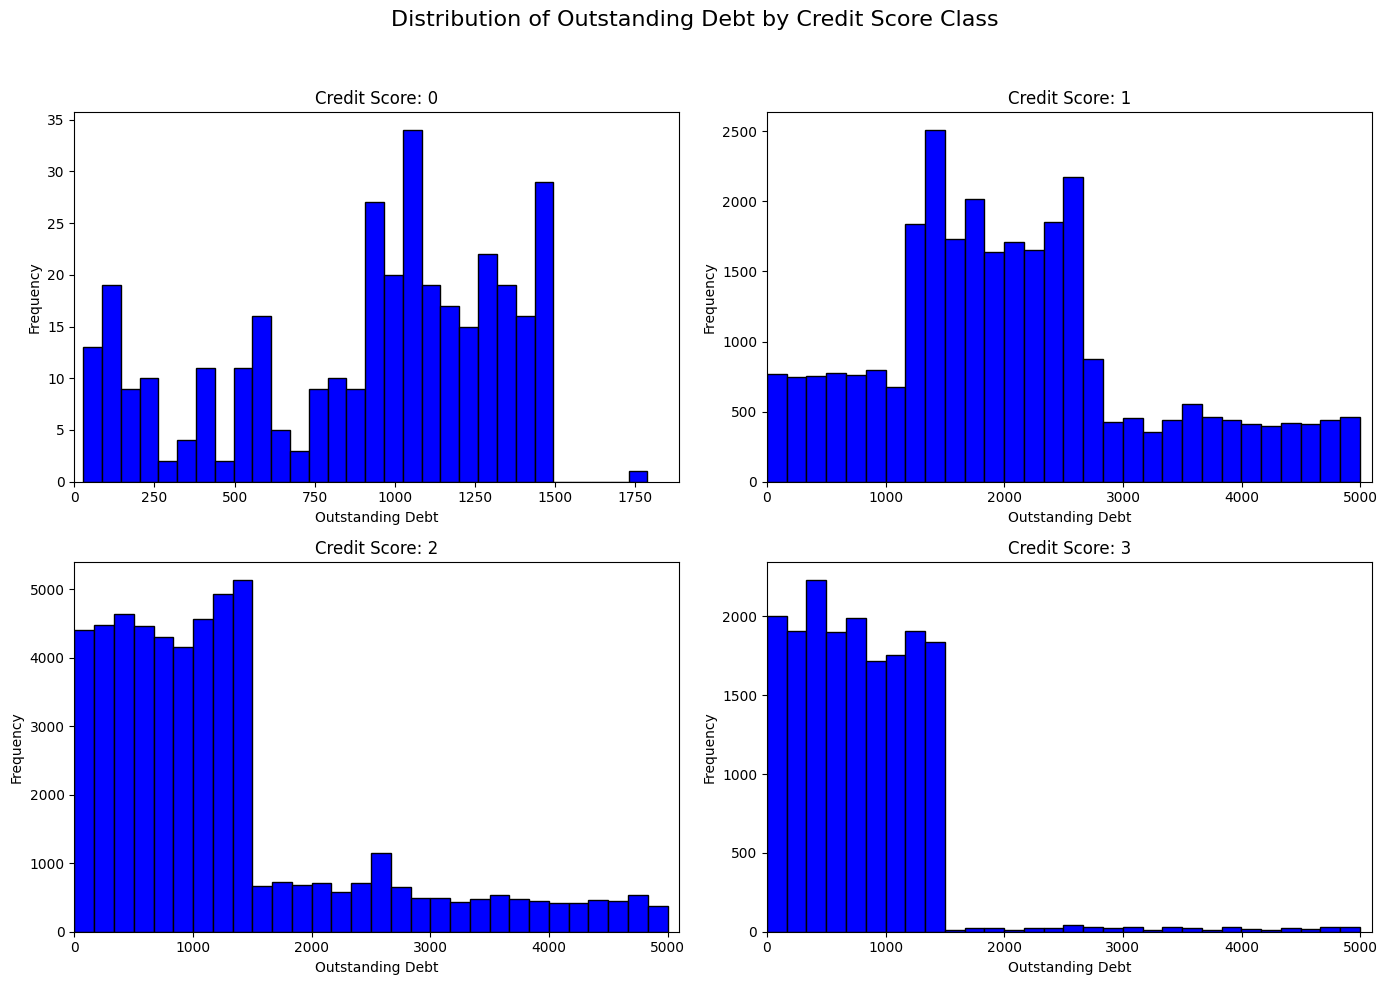

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Outstanding Debt by Credit Score Class', fontsize=16)
axes = axes.flatten()

for i in range(4):
    subset = clean_credit_card_df[clean_credit_card_df['Credit_Score'] == i]['Outstanding_Debt'].dropna()
    
    axes[i].hist(subset, bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Credit Score: {i}')
    axes[i].set_xlabel('Outstanding Debt')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, subset.max() + 100)  # Optional: still okay to set xlim

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

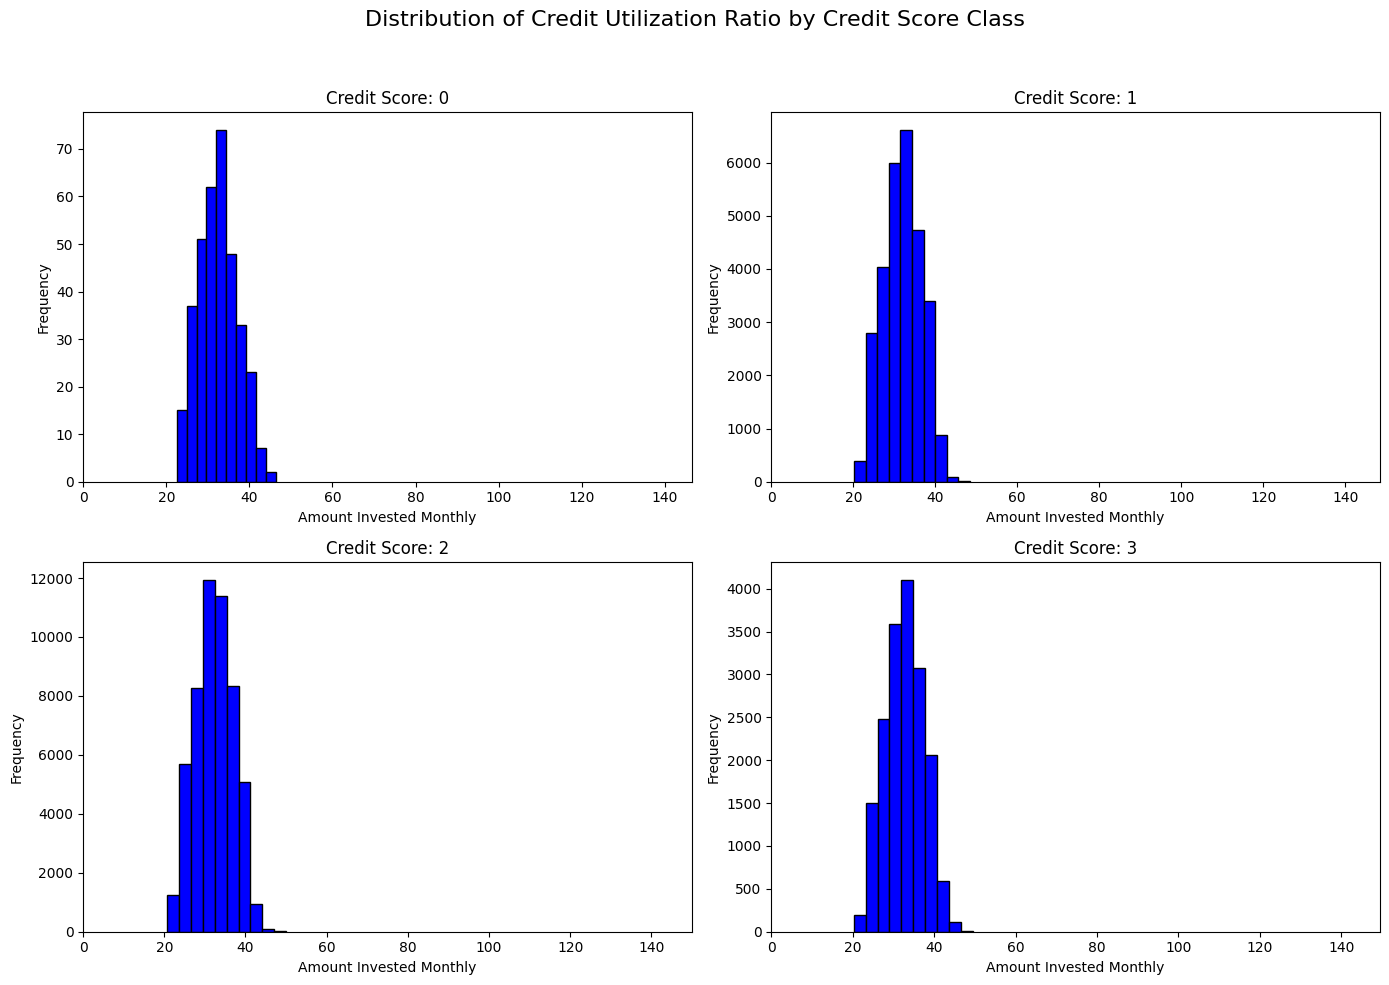

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Credit Utilization Ratio by Credit Score Class', fontsize=16)
axes = axes.flatten()

for i in range(4):
    subset = clean_credit_card_df[clean_credit_card_df['Credit_Score'] == i]['Credit_Utilization_Ratio'].dropna()
    
    axes[i].hist(subset, bins=10, color='blue', edgecolor='black')
    axes[i].set_title(f'Credit Score: {i}')
    axes[i].set_xlabel('Amount Invested Monthly')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, subset.max() + 100)  # Optional: still okay to set xlim

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

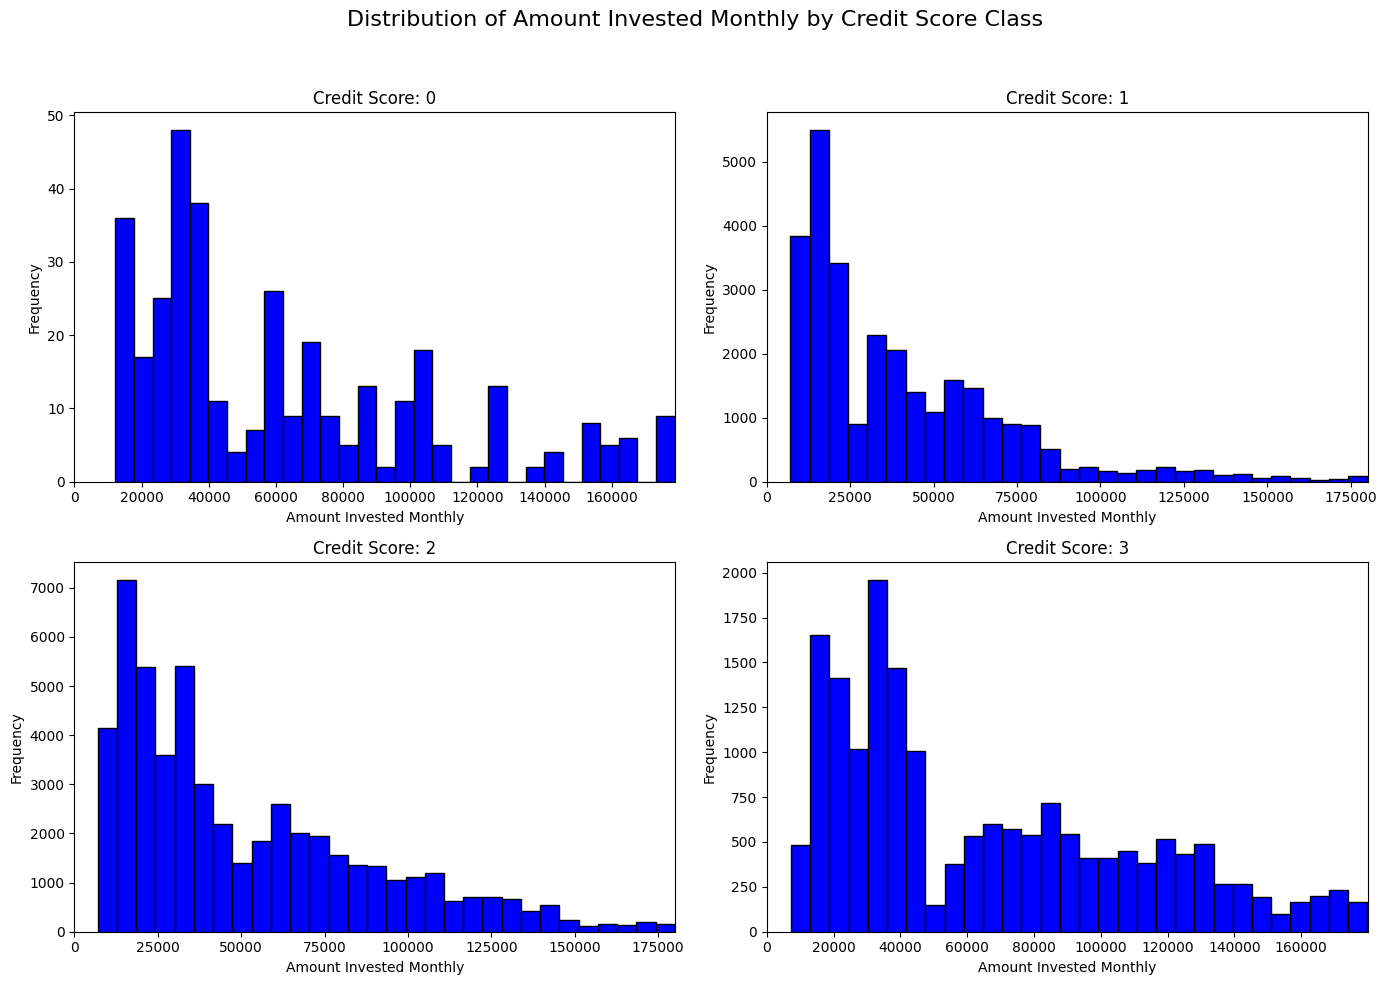

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Amount Invested Monthly by Credit Score Class', fontsize=16)
axes = axes.flatten()

for i in range(4):
    subset = clean_credit_card_df[clean_credit_card_df['Credit_Score'] == i]['Annual_Income'].dropna()
    
    axes[i].hist(subset, bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Credit Score: {i}')
    axes[i].set_xlabel('Amount Invested Monthly')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, subset.max() + 100)  # Optional: still okay to set xlim

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

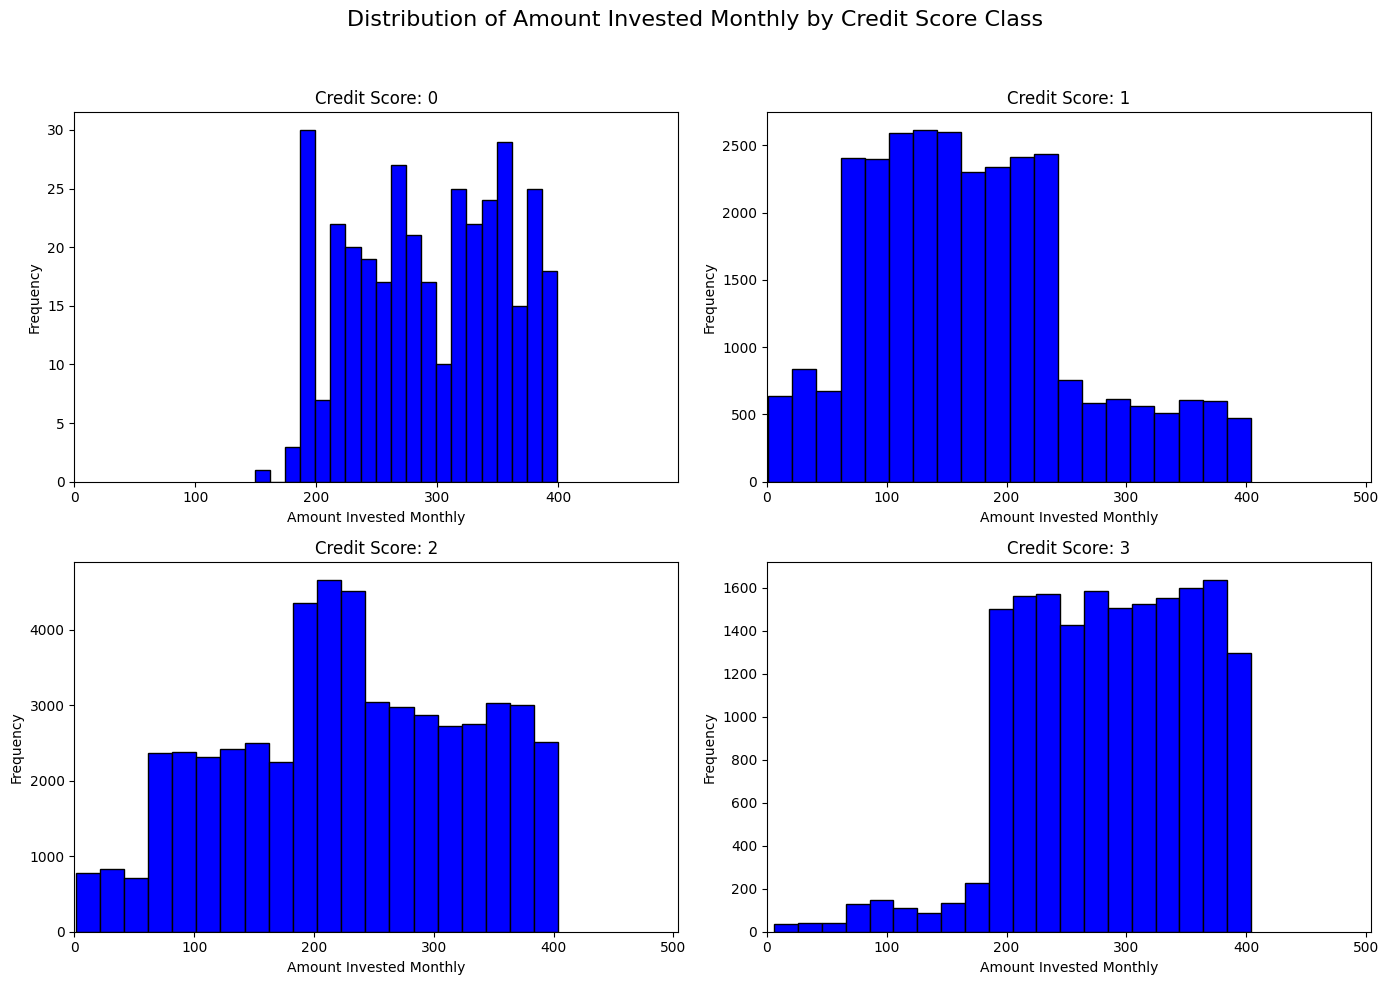

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Amount Invested Monthly by Credit Score Class', fontsize=16)
axes = axes.flatten()

for i in range(4):
    subset = clean_credit_card_df[clean_credit_card_df['Credit_Score'] == i]['Credit_History_Age'].dropna()
    
    axes[i].hist(subset, bins=20, color='blue', edgecolor='black')
    axes[i].set_title(f'Credit Score: {i}')
    axes[i].set_xlabel('Amount Invested Monthly')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, subset.max() + 100)  # Optional: still okay to set xlim

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
## Removing outliers from the dataset

def remove_outliers(df, column):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
      df: pandas DataFrame
      column: Column name from which to remove outliers
      
    Returns:
      A new DataFrame with outliers removed from the specified column.
    """
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 10 * IQR
    upper_bound = Q3 + 10 * IQR
    
    # Filter the DataFrame to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Shape of the DataFrame before removing outliers: {credit_card_df.shape}")

# Loop through each numerical feature and remove outliers
for col in numerical_features:
    credit_card_df = remove_outliers(credit_card_df, col)

# Display the shape of the DataFrame after removing outliers
print(f"Shape of the DataFrame after removing outliers: {credit_card_df.shape}")